# Amazon categories

This notebook looks into the different categories of items in the Amazon dataset, available at <http://jmcauley.ucsd.edu/data/amazon/links.html>.

In [1]:
import ast
import collections
import matplotlib.pyplot as plt
import numpy as np
import pickle

## Extracting categories of items

This series of cells is quite computationally demanding—do not re-execute every time.

In [2]:
%%time
cats = dict()
no_cats = 0
with open("../_data/amazon/metadata.json") as f:
    for line in f:
        x = ast.literal_eval(line)
        if "categories" in x:
            cats[x["asin"]] = x["categories"]
        else:
            no_cats += 1

CPU times: user 14min 10s, sys: 36 s, total: 14min 46s
Wall time: 14min 50s


In [13]:
print(f"# items with categories: {len(cats):> 10,}")
print(f"# items w/o categories:  {no_cats:> 10,}")

# items with categories:  9,354,832
# items w/o categories:      75,256


In [102]:
%%time
with open("../_data/amazon/categories-raw.pkl", "wb") as f:
    pickle.dump(cats, f)

CPU times: user 26.3 s, sys: 8.67 s, total: 35 s
Wall time: 37.2 s


## Number & nature of categories

In [2]:
%%time
with open("../_data/amazon/categories-raw.pkl", "rb") as f:
    cats = pickle.load(f)

CPU times: user 25.9 s, sys: 7.22 s, total: 33.2 s
Wall time: 34.3 s


In [3]:
n_cats = [len(x) for x in cats.values()]

Text(0.5, 1.0, 'Histogram of # categories per item')

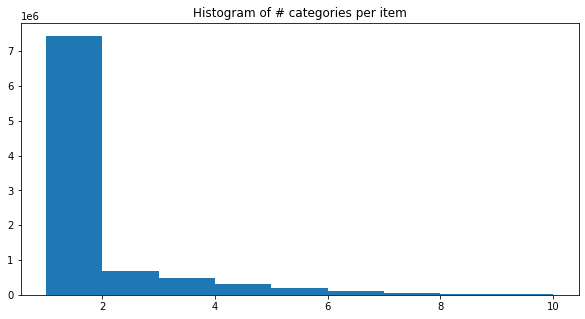

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
bins = np.arange(1, 11)
ax.hist(n_cats, bins=bins);
#x.set_yscale("log")
ax.set_title("Histogram of # categories per item")

In [5]:
%%time
tl = collections.Counter()
for x in cats.values():
    # Only consider the first category of every item.
    tl[x[0][0]] += 1

CPU times: user 3.07 s, sys: 249 ms, total: 3.32 s
Wall time: 3.36 s


In [6]:
for cat, n in tl.most_common(n=30):
    print(f"{n:> 10,}  {cat}")

 2,369,971  Books
 1,435,869  Clothing, Shoes & Jewelry
   529,989  Sports & Outdoors
   495,481  Electronics
   491,713  CDs & Vinyl
   436,960  Home & Kitchen
   346,720  Cell Phones & Accessories
   335,488  Toys & Games
   331,049  Automotive
   270,372  Digital Music
   268,469  Tools & Home Improvement
   262,317  Health & Personal Care
   259,170  Beauty
   194,914  
   194,874  Movies & TV
   171,751  Grocery & Gourmet Food
   134,283  Office Products
   117,403  Arts, Crafts & Sewing
   110,535  Pet Supplies
   108,852  Patio, Lawn & Garden
    71,317  Baby
    68,463  Musical Instruments
    61,551  Apps for Android
    48,864  Video Games
    47,196  Industrial & Scientific
    30,648  Amazon Instant Video
    24,145  Amazon Fashion
    17,718  Software
    11,654  Appliances
    10,020  Baby Products


## Correlation across categories

In [7]:
selection = (
    "Books",
    "Clothing, Shoes & Jewelry",
    "Sports & Outdoors",
    "Electronics",
    "CDs & Vinyl",
    "Home & Kitchen",
    "Cell Phones & Accessories",
    "Toys & Games",
    "Automotive",
    "Digital Music",
    "Tools & Home Improvement",
    "Health & Personal Care",
    "Beauty",
    "Movies & TV",
    "Grocery & Gourmet Food",
    "Office Products",
    "Arts, Crafts & Sewing",
    "Pet Supplies",
    "Patio, Lawn & Garden",
    "Baby",
    "Musical Instruments",
    "Apps for Android",
    "Video Games",
    "Industrial & Scientific",
    "Amazon Instant Video",
    "Amazon Fashion",
    "Software",
    "Appliances",
    "Baby Products",
)

cat2idx = {cat: idx for idx, cat in enumerate(selection)}

In [8]:
%%time
asins = list()
vecs = list()

for asin, x in cats.items():
    vec = np.zeros(len(selection), dtype=float)
    for cat in x:
        if cat[0] in cat2idx:
            vec[cat2idx[cat[0]]] = 1
    vecs.append(vec)
    asins.append(asin)
    
vecs = np.array(vecs)
vecs.shape

CPU times: user 22.1 s, sys: 3.08 s, total: 25.2 s
Wall time: 25.5 s


(9354832, 29)

In [9]:
%%time
mat = np.dot(vecs.T, vecs)
normalized = mat / np.diag(mat)

CPU times: user 817 ms, sys: 68.1 ms, total: 885 ms
Wall time: 888 ms


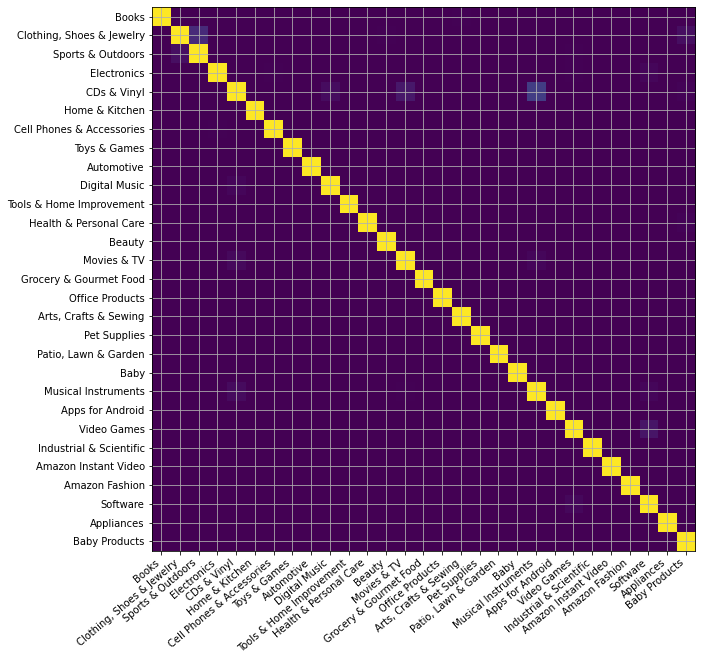

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(normalized)
ax.set_yticks(range(len(selection)))
ax.set_yticklabels(selection)
ax.set_xticks(range(len(selection)))
ax.set_xticklabels(selection, rotation="40", ha="right");
ax.grid(axis="both")

In log-scale to better identify potentially problematic category pairs.

/Users/lucasm/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


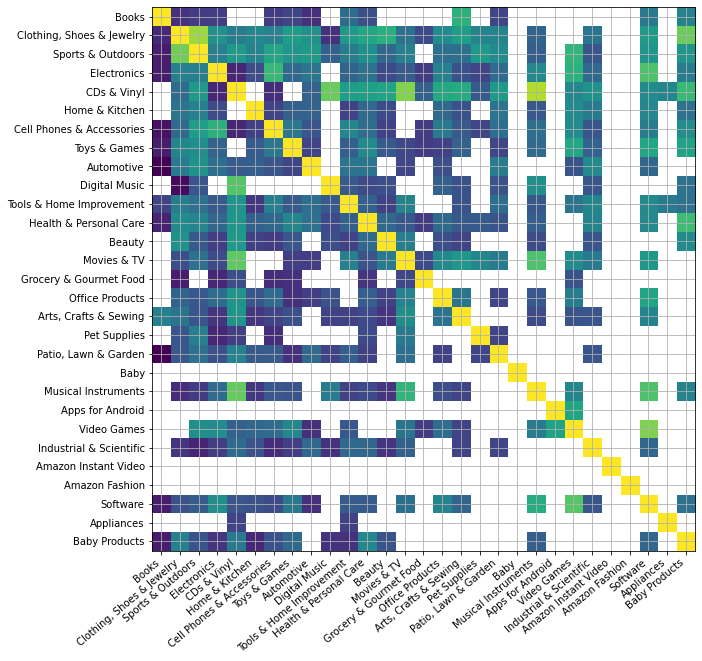

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(np.log(normalized))
ax.set_yticks(range(len(selection)))
ax.set_yticklabels(selection)
ax.set_xticks(range(len(selection)))
ax.set_xticklabels(selection, rotation="40", ha="right");
ax.grid(axis="both")

## Final selection

Top categories by # reviews (<http://jmcauley.ucsd.edu/data/amazon/>):

- Books (22,507,155 ratings)
- Electronics (7,824,482 ratings)
- Movies and TV (4,607,047 ratings)
- CDs and Vinyl (3,749,004 ratings)
- Clothing, Shoes and Jewelry (5,748,920 ratings)
- Home and Kitchen (4,253,926 ratings)
- Kindle Store (3,205,467 ratings)
- Sports and Outdoors (3,268,695 ratings)
- Cell Phones and Accessories (3,447,249 ratings)
- Health and Personal Care (2,982,326 ratings)
- Toys and Games (2,252,771 ratings)
- Video Games (1,324,753 ratings)
- Tools and Home Improvement (1,926,047 ratings)
- Beauty (2,023,070 ratings)
- Apps for Android (2,638,172 ratings)
- Office Products (1,243,186 ratings)

In [12]:
selection = (
    "Books",
    "Clothing, Shoes & Jewelry",
    "Sports & Outdoors",
    "Electronics",
    "CDs & Vinyl",
)
cat2idx = {cat: idx for idx, cat in enumerate(selection)}

In [13]:
%%time
asins = list()
vecs = list()

for asin, x in cats.items():
    vec = np.zeros(len(selection), dtype=float)
    for cat in x:
        if cat[0] in cat2idx:
            vec[cat2idx[cat[0]]] = 1
    vecs.append(vec)
    asins.append(asin)
    
vecs = np.array(vecs)
vecs.shape

CPU times: user 19.4 s, sys: 2.55 s, total: 22 s
Wall time: 22.1 s


(9354832, 5)

In [14]:
%%time
mat = np.dot(vecs.T, vecs)
normalized = mat / np.diag(mat)

CPU times: user 97.8 ms, sys: 867 µs, total: 98.7 ms
Wall time: 97.8 ms


/Users/lucasm/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


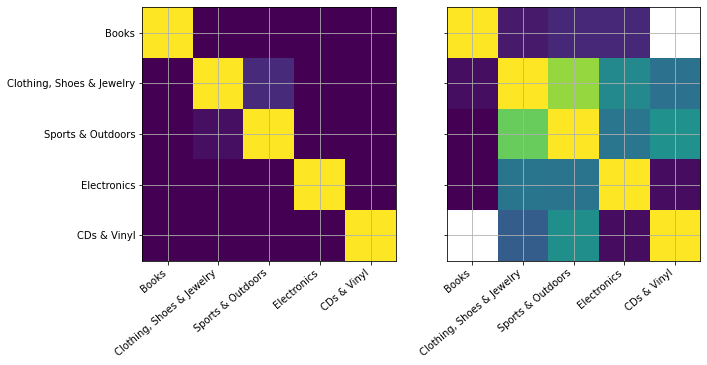

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7), sharey=True)

ax1.imshow(normalized)
ax2.imshow(np.log(normalized))

ax1.set_yticks(range(len(selection)))
ax1.set_yticklabels(selection)

for ax in (ax1, ax2):
    ax.set_xticks(range(len(selection)))
    ax.set_xticklabels(selection, rotation="40", ha="right");
    ax.grid(axis="both")

### Save the resulting labels to a file

In [16]:
%%time
final = dict()
for asin, x in cats.items():
    if x[0][0] in cat2idx:
        final[asin] = x[0][0]
len(final)

CPU times: user 3.49 s, sys: 81.2 ms, total: 3.57 s
Wall time: 3.58 s


5323023

In [17]:
%%time
with open("../_data/amazon/categories-final.pkl", "wb") as f:
    pickle.dump(final, f)

CPU times: user 3.21 s, sys: 364 ms, total: 3.58 s
Wall time: 3.59 s
